In [75]:
import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xg
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [76]:
dataset = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Health%20Insurance%20Cost%20Prediction/insurance.csv")

In [77]:
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [78]:
dataset.shape

(1338, 7)

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [80]:
dataset.sex = dataset.sex.astype('category')
dataset.smoker = dataset.smoker.astype('category')
dataset.region = dataset.region.astype('category')

In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


<AxesSubplot:>

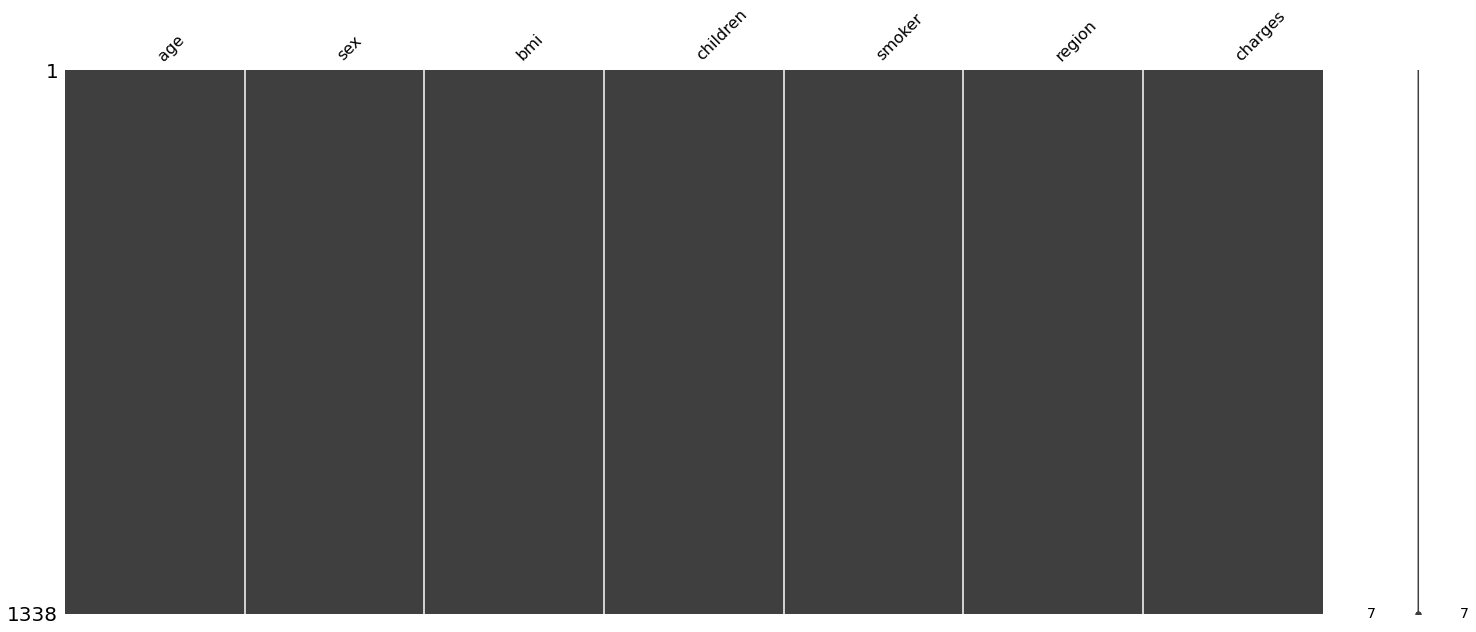

In [82]:
missingno.matrix(dataset)

In [83]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [84]:
sex_count = dataset['sex'].value_counts(dropna = False)
sex_count

male      676
female    662
Name: sex, dtype: int64

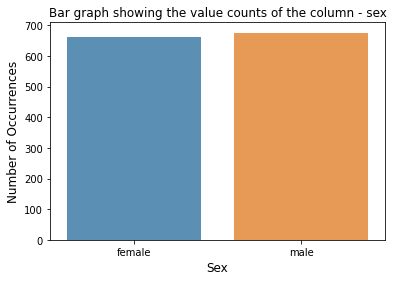

In [85]:
sns.barplot(sex_count.index, sex_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - sex')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Sex', fontsize = 12)
plt.show()

In [86]:
mean_price_sex = dataset[['sex', 'charges']].groupby('sex', as_index = False).mean()
mean_price_sex

,sex,charges
0,female,12569.578844
1,male,13956.751178


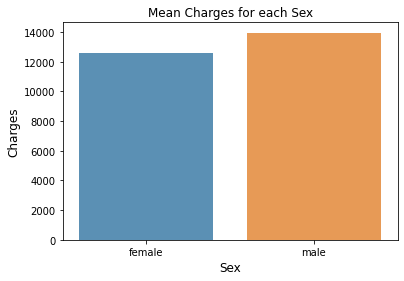

In [87]:
sns.barplot(mean_price_sex['sex'], mean_price_sex['charges'], alpha = 0.8)
plt.title('Mean Charges for each Sex')
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('Sex', fontsize = 12)
plt.show()

In [88]:
smoker_count = dataset['smoker'].value_counts(dropna = False)
smoker_count

no     1064
yes     274
Name: smoker, dtype: int64

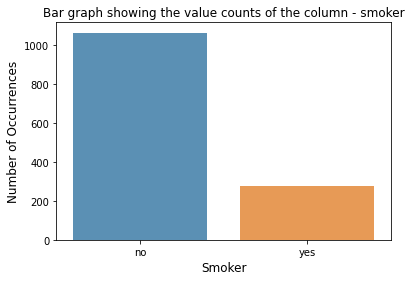

In [89]:
sns.barplot(smoker_count.index, smoker_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - smoker')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Smoker', fontsize = 12)
plt.show()

In [90]:
mean_price_smoker = dataset[['smoker', 'charges']].groupby('smoker', as_index = False).mean()
mean_price_smoker

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


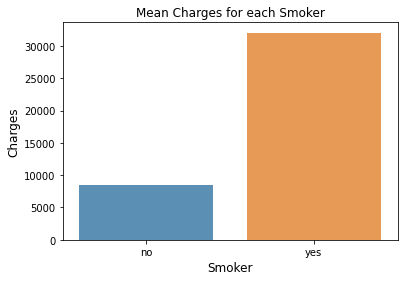

In [91]:
sns.barplot(mean_price_smoker['smoker'], mean_price_smoker['charges'], alpha = 0.8)
plt.title('Mean Charges for each Smoker')
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('Smoker', fontsize = 12)
plt.show()

Text(0.5, 1.0, 'Mean Charges by Sex and Smoker')

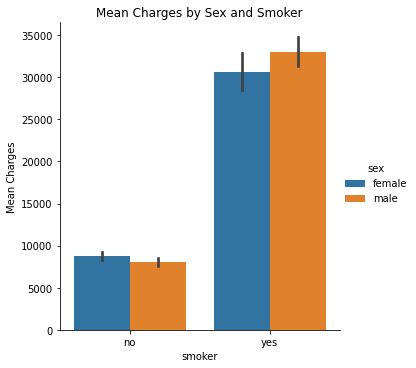

In [92]:
sns.factorplot(x = 'smoker', y = 'charges', hue = 'sex', data = dataset, kind = 'bar')
plt.ylabel('Mean Charges')
plt.title('Mean Charges by Sex and Smoker')

Text(0.5, 1.0, 'Mean Charges by Sex and Smoker')

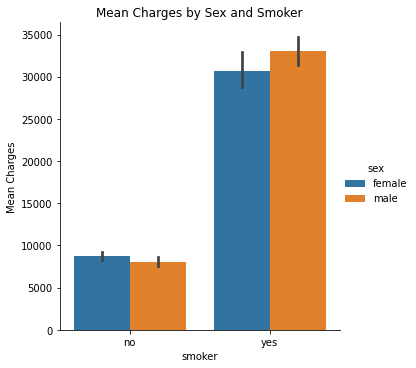

In [93]:
sns.factorplot(x = 'smoker', y = 'charges', hue = 'sex', data = dataset, kind = 'bar')
plt.ylabel('Mean Charges')
plt.title('Mean Charges by Sex and Smoker')

In [94]:
region_count = dataset['region'].value_counts(dropna = False)
region_count

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

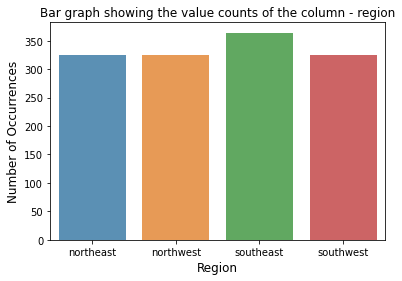

In [95]:
sns.barplot(region_count.index, region_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - region')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Region', fontsize = 12)
plt.show()

In [96]:
mean_price_region = dataset[['region', 'charges']].groupby('region', as_index = False).mean()
mean_price_region

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


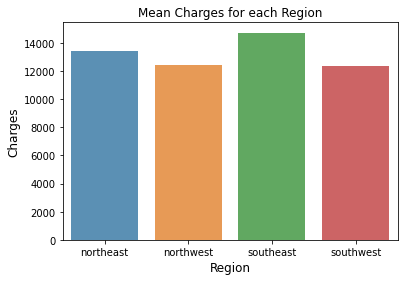

In [97]:
sns.barplot(mean_price_region['region'], mean_price_region['charges'], alpha = 0.8)
plt.title('Mean Charges for each Region')
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('Region', fontsize = 12)
plt.show()

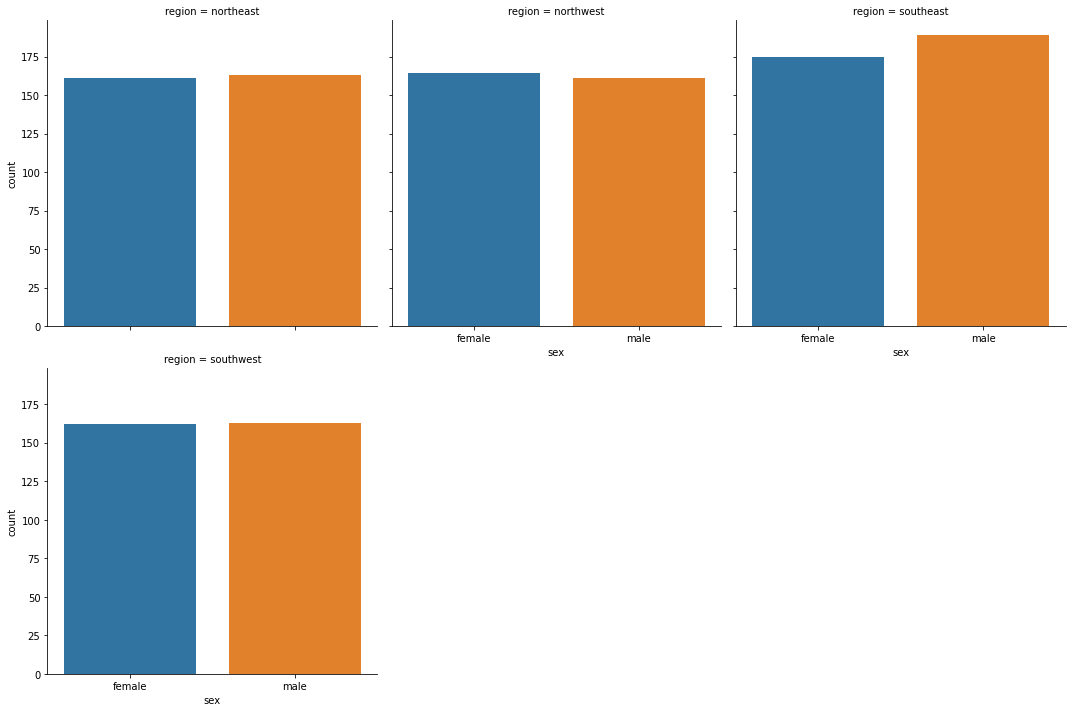

In [98]:
sns.factorplot('sex', col = 'region', data = dataset, kind = 'count', col_wrap = 3)

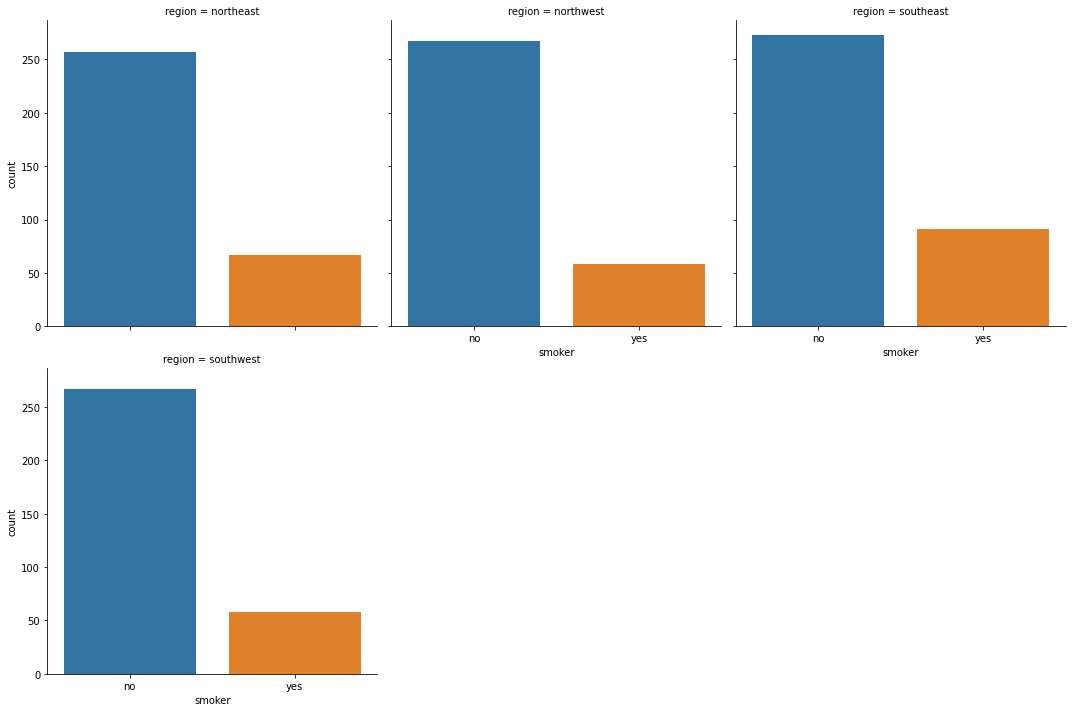

In [99]:
sns.factorplot('smoker', col = 'region', data = dataset, kind = 'count', col_wrap = 3)

Text(0.5, 1.0, 'Distribution of the column - age')

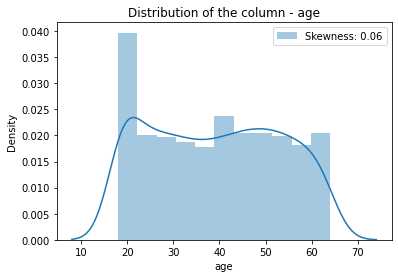

In [100]:
sns.distplot(dataset['age'], label = 'Skewness: %.2f'%(dataset['age'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - age')

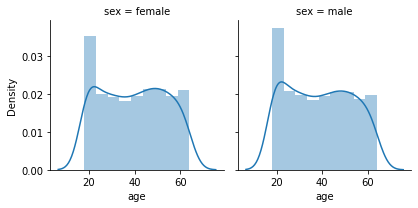

In [101]:
grid = sns.FacetGrid(dataset, col = 'sex')
grid.map(sns.distplot, 'age')

Text(0.5, 1.0, 'Age Distribution by Sex')

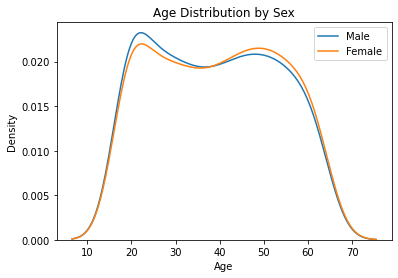

In [102]:
sns.kdeplot(dataset['age'][dataset['sex'] == 'male'], label = 'Male')
sns.kdeplot(dataset['age'][dataset['sex'] == 'female'], label = 'Female')
plt.xlabel('Age')
plt.legend()
plt.title('Age Distribution by Sex')

<AxesSubplot:>

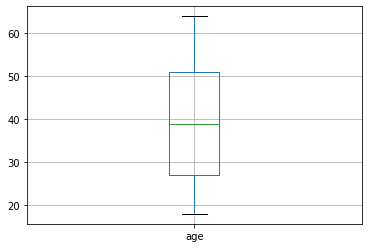

In [103]:
dataset.boxplot(column = ['age'])

Text(0.5, 1.0, 'Distribution of the column - bmi')

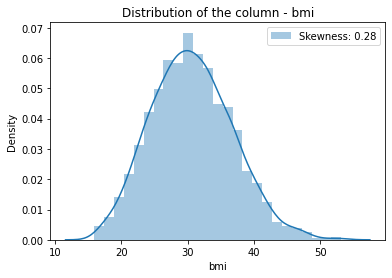

In [104]:
sns.distplot(dataset['bmi'], label = 'Skewness: %.2f'%(dataset['bmi'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - bmi')

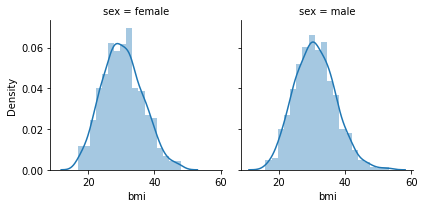

In [105]:
grid = sns.FacetGrid(dataset, col = 'sex')
grid.map(sns.distplot, 'bmi')

Text(0.5, 1.0, 'BMI Distribution by Sex')

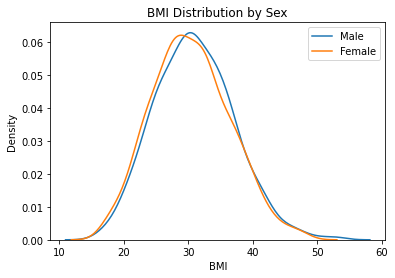

In [106]:
sns.kdeplot(dataset['bmi'][dataset['sex'] == 'male'], label = 'Male')
sns.kdeplot(dataset['bmi'][dataset['sex'] == 'female'], label = 'Female')
plt.xlabel('BMI')
plt.legend()
plt.title('BMI Distribution by Sex')

<AxesSubplot:>

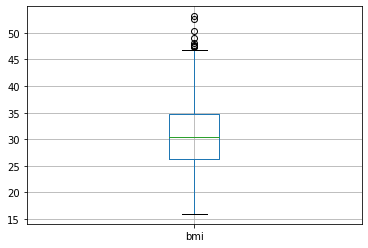

In [107]:
dataset.boxplot(column = ['bmi'])

Text(0.5, 1.0, 'Distribution of the column - children')

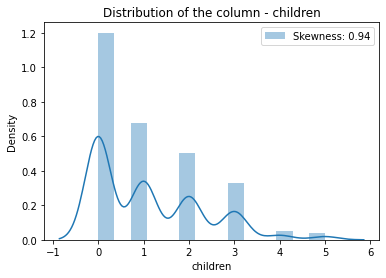

In [108]:
sns.distplot(dataset['children'], label = 'Skewness: %.2f'%(dataset['children'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - children')

<AxesSubplot:>

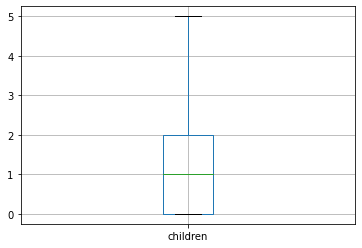

In [109]:
dataset.boxplot(column = ['children'])

Text(0.5, 1.0, 'Distribution of the column - charges')

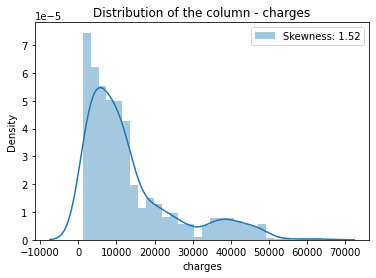

In [110]:
sns.distplot(dataset['charges'], label = 'Skewness: %.2f'%(dataset['charges'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - charges')

<AxesSubplot:>

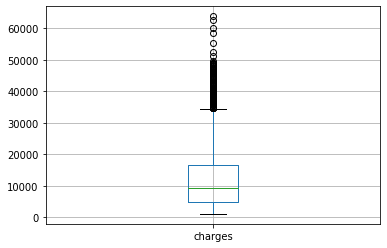

In [111]:
dataset.boxplot(column = ['charges'])

In [112]:
modified_dataset = dataset.copy()
modified_dataset.drop(['region'], axis = 1, inplace = True)

In [113]:
modified_dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


Text(0.5, 1.0, 'Distribution of the column - children')

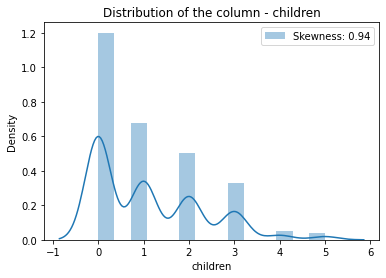

In [114]:
sns.distplot(modified_dataset['children'], label = 'Skewness: %.2f'%(modified_dataset['children'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - children')

Text(0.5, 1.0, 'Distribution of the column - children')

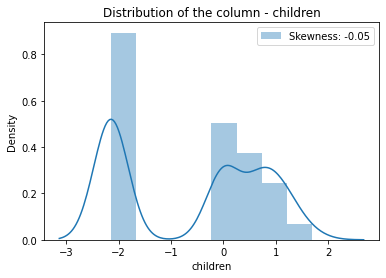

In [115]:
children_data = [0.1 if value == 0 else value for value in modified_dataset['children']]

modified_children, _ = stats.boxcox(children_data)
modified_dataset['children'] = modified_children

sns.distplot(modified_dataset['children'], label = 'Skewness: %.2f'%(modified_dataset['children'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - children')

In [116]:
def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)
    
    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))
    
    dataframe[column] = new_data

numerical_columns = ['age', 'bmi', 'children']

for each_column in numerical_columns:
    normalize_columns(modified_dataset, each_column)

modified_dataset

,age,sex,bmi,children,smoker,charges
0,0.021739,female,0.321227,0.000000,yes,16884.92400
1,0.000000,male,0.479150,0.559508,no,1725.55230
2,0.217391,male,0.458434,0.855475,no,4449.46200
3,0.326087,male,0.181464,0.000000,no,21984.47061
4,0.304348,male,0.347592,0.000000,no,3866.85520
...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.855475,no,10600.54830
1334,0.000000,female,0.429379,0.000000,no,2205.98080
1335,0.000000,female,0.562012,0.000000,no,1629.83350
1336,0.065217,female,0.264730,0.000000,no,2007.94500


In [117]:
encoded_dataset = pd.get_dummies(data = modified_dataset, columns = ['sex', 'smoker'])
encoded_dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,0.021739,0.321227,0.000000,16884.92400,1,0,0,1
1,0.000000,0.479150,0.559508,1725.55230,0,1,1,0
2,0.217391,0.458434,0.855475,4449.46200,0,1,1,0
3,0.326087,0.181464,0.000000,21984.47061,0,1,1,0
4,0.304348,0.347592,0.000000,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.855475,10600.54830,0,1,1,0
1334,0.000000,0.429379,0.000000,2205.98080,1,0,1,0
1335,0.000000,0.562012,0.000000,1629.83350,1,0,1,0
1336,0.065217,0.264730,0.000000,2007.94500,1,0,1,0


In [118]:
target_data = encoded_dataset['charges']
encoded_dataset['Target'] = target_data
encoded_dataset.drop(['charges'], axis = 1, inplace = True)
encoded_dataset

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,Target
0,0.021739,0.321227,0.000000,1,0,0,1,16884.92400
1,0.000000,0.479150,0.559508,0,1,1,0,1725.55230
2,0.217391,0.458434,0.855475,0,1,1,0,4449.46200
3,0.326087,0.181464,0.000000,0,1,1,0,21984.47061
4,0.304348,0.347592,0.000000,0,1,1,0,3866.85520
...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.855475,0,1,1,0,10600.54830
1334,0.000000,0.429379,0.000000,1,0,1,0,2205.98080
1335,0.000000,0.562012,0.000000,1,0,1,0,1629.83350
1336,0.065217,0.264730,0.000000,1,0,1,0,2007.94500


In [119]:
filter_dataset = encoded_dataset[['age', 'bmi', 'children']]
filter_dataset

,age,bmi,children
0,0.021739,0.321227,0.000000
1,0.000000,0.479150,0.559508
2,0.217391,0.458434,0.855475
3,0.326087,0.181464,0.000000
4,0.304348,0.347592,0.000000
...,...,...,...
1333,0.695652,0.403820,0.855475
1334,0.000000,0.429379,0.000000
1335,0.000000,0.562012,0.000000
1336,0.065217,0.264730,0.000000


Text(0.5, 1.0, 'Correlation Heatmap')

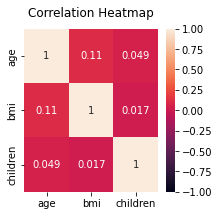

In [120]:
plt.figure(figsize = (3, 3))
heatmap = sns.heatmap(filter_dataset.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

In [121]:

column_names = list(filter_dataset.columns)

for name in column_names:
    if len(column_names) >= 2:
        Y = filter_dataset.loc[:, filter_dataset.columns == name]
        X = filter_dataset.loc[:, filter_dataset.columns != name]
        X = sm.add_constant(X)
        linear_model = sm.OLS(Y, X)
        results = linear_model.fit()
        r_squared = results.rsquared
        vif_value = round(1/(1 - r_squared), 2)
        print("Column: {} and VIF: {}".format(name, vif_value))
        
        if vif_value > 10:
            filter_dataset = filter_dataset.drop([name], axis = 1)
            column_names.remove(name)

Column: age and VIF: 1.01
Column: bmi and VIF: 1.01
Column: children and VIF: 1.0


In [122]:
X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values

X

array([[0.02173913, 0.3212268 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.47914985, 0.55950799, ..., 1.        , 1.        ,
        0.        ],
       [0.2173913 , 0.45843422, 0.85547528, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.93478261, 0.35270379, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [123]:
Y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27, shuffle = True)

In [125]:
model_rmse = OrderedDict()

model_r2 = OrderedDict()

In [126]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [127]:
Y_pred = linear_regressor.predict(X_test)

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Multi Linear Regression'] = rmse
model_r2['Multi Linear Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6301.154
R-squared value of the model is : 0.73


In [128]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [129]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-36389842.60878425


In [130]:
Y_pred = lasso_regressor.predict(X_test)

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Lasso Regression'] = rmse
model_r2['Lasso Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6310.64
R-squared value of the model is : 0.729


In [131]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [132]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-36389824.306045674


In [133]:
Y_pred = ridge_regressor.predict(X_test)

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Ridge Regression'] = rmse
model_r2['Ridge Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6310.666
R-squared value of the model is : 0.729


In [134]:
support_vector_regressor = SVR(kernel = 'rbf')
support_vector_regressor.fit(X_train, Y_train)

SVR()

In [135]:
Y_pred = support_vector_regressor.predict(X_test)

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Support Vector Regression'] = rmse
model_r2['Support Vector Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 12708.812
R-squared value of the model is : -0.097


In [136]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [137]:
Y_pred = decision_tree_regressor.predict(X_test)

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Decision Tree Regression'] = rmse
model_r2['Decision Tree Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 7340.685
R-squared value of the model is : 0.634


In [138]:
random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=27)

In [139]:
Y_pred = random_forest_regressor.predict(X_test)

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (10 trees)'] = rmse
model_r2['Random Forest Regression (10 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5674.102
R-squared value of the model is : 0.781


In [140]:
random_forest_regressor = RandomForestRegressor(n_estimators = 25, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=25, random_state=27)

In [141]:
Y_pred = random_forest_regressor.predict(X_test)

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (25 trees)'] = rmse
model_r2['Random Forest Regression (25 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5720.118
R-squared value of the model is : 0.778


In [142]:
random_forest_regressor = RandomForestRegressor(n_estimators = 50, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50, random_state=27)

In [143]:

Y_pred = random_forest_regressor.predict(X_test)

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (50 trees)'] = rmse
model_r2['Random Forest Regression (50 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5627.492
R-squared value of the model is : 0.785


In [144]:
random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=27)

In [145]:
Y_pred = random_forest_regressor.predict(X_test)

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (100 trees)'] = rmse
model_r2['Random Forest Regression (100 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5568.514
R-squared value of the model is : 0.789


In [146]:
random_forest_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=27)

In [147]:
Y_pred = random_forest_regressor.predict(X_test)

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (1000 trees)'] = rmse
model_r2['Random Forest Regression (1000 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5507.017
R-squared value of the model is : 0.794


In [149]:
xgboost_regressor = xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 27)
xgboost_regressor.fit(X_train, Y_train)

[19:21:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=27, reg_alpha=0, ...)

In [150]:
Y_pred = xgboost_regressor.predict(X_test)

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['XGBoost Regression'] = rmse
model_r2['XGBoost Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5450.901
R-squared value of the model is : 0.798


In [151]:
model_rmse

OrderedDict([('Multi Linear Regression', 6301.154),
             ('Lasso Regression', 6310.64),
             ('Ridge Regression', 6310.666),
             ('Support Vector Regression', 12708.812),
             ('Decision Tree Regression', 7340.685),
             ('Random Forest Regression (10 trees)', 5674.102),
             ('Random Forest Regression (25 trees)', 5720.118),
             ('Random Forest Regression (50 trees)', 5627.492),
             ('Random Forest Regression (100 trees)', 5568.514),
             ('Random Forest Regression (1000 trees)', 5507.017),
             ('XGBoost Regression', 5450.901)])

In [152]:
model_r2

OrderedDict([('Multi Linear Regression', 0.73),
             ('Lasso Regression', 0.729),
             ('Ridge Regression', 0.729),
             ('Support Vector Regression', -0.097),
             ('Decision Tree Regression', 0.634),
             ('Random Forest Regression (10 trees)', 0.781),
             ('Random Forest Regression (25 trees)', 0.778),
             ('Random Forest Regression (50 trees)', 0.785),
             ('Random Forest Regression (100 trees)', 0.789),
             ('Random Forest Regression (1000 trees)', 0.794),
             ('XGBoost Regression', 0.798)])

In [153]:
table = []
table.append(['S.No.', 'Classification Model', 'Root Mean Squared Error', 'R-squared'])
count = 1

for model in model_rmse:
    row = [count, model, model_rmse[model], model_r2[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═══════════════════════════════════════╤═══════════════════════════╤═════════════╕
│   S.No. │ Classification Model                  │   Root Mean Squared Error │   R-squared │
╞═════════╪═══════════════════════════════════════╪═══════════════════════════╪═════════════╡
│       1 │ Multi Linear Regression               │                   6301.15 │       0.73  │
├─────────┼───────────────────────────────────────┼───────────────────────────┼─────────────┤
│       2 │ Lasso Regression                      │                   6310.64 │       0.729 │
├─────────┼───────────────────────────────────────┼───────────────────────────┼─────────────┤
│       3 │ Ridge Regression                      │                   6310.67 │       0.729 │
├─────────┼───────────────────────────────────────┼───────────────────────────┼─────────────┤
│       4 │ Support Vector Regression             │                  12708.8  │      -0.097 │
├─────────┼───────────────────────────────────────┼─────────